# Generating Discrete Random Variables

Suppose $X$ is a discrete random variable having probability mass function
$$P(X = x_j) = p_j \quad j = 0,1, \dots \quad \sum p_j = 1$$
Examples if such random variables are: Bernoulli, Poisson, Geometric, Negative Binomial, Binomial etc. We will learn two main methods to draw samples realizations of this discrete random variable:
1. Inverse transform method
2. The acceptance-rejection technique

## Inverse transform method

We will demonstrate this method with an example first.

*Example 1* (Bernoulli distribution). If $X \sim \mathrm{Bern}(p)$, then $$P(X = 0) = q = 1 - p \ \mathrm{and} \ P(X = 1) = p.$$
Let $U \sim U(0,1)$. Define
$$X = \begin{cases} 0 & U \leq q \\ 1 & q < U \leq 1  \end{cases}$$
Then $X \sim \mathrm{Bern}(p)$. \
*Proof.* To show the result we only need to show that $P(X = 1) = p$ and $P(X = 0) = 1 - p$. Recall that by the cumulative distribution function of $U[0,1]$, for any $0 < t < 1, P(U \leq t) = t$. Using this,
$$P(X = 0) = P(U \leq q) = q$$,
and also 
$$P(X = 1) = P(q < U \leq 1) = 1 - q = p$$.

**Algorithm 1** Inverse transform for Bern(*p*)
1. Draw $U \sim U[0,1]$
2. if $U \leq q$ then $X = 0$ else $X = 1$

**Inverse transform method:**  The principles used in the above examples cab be extended to any generic discrete distribution. For a distribution with mass function $$P(X = x_j) = p_j$$ for $j = 0,1, \dots $ with $\sum p_j = 1$.\

Let $U \sim U[0,1]$.

Set $X$ to be $$X = \begin{cases} x_0 & U \leq p_0\\ x_1 &p_0 < U \leq p_0 + p_1\\ x_2 & p_0 + p_1 < U \leq p_0 + p_1 + p_2\\ \vdots &\\ x_j & \sum_{i=0}^{j=1}p_i < U \leq \sum_{i=0}^j p_i \end{cases}$$
This works because
$$P(X = x_j) = P\left( \sum_{i=0}^{j-1}p_i < U \leq \sum_{i=0}^{j} p_i\right) = \sum_{i = 0}^{j} p_i - \sum_{i=0}^{j-1}p_i = p_j$$

This method is called the *Inverse transform method* since the algorithm is essential in looking at the inverse cumulative distribution function of the random variable.
![image-2.png](attachment:image-2.png)
*Example 2* (Poisson random variables). The probability mass function for the Poisson random variable is $$P(X = i) = p_i = \frac{e^{-\lambda}\lambda^i}{i!} \quad i = 0,1,2, \dots$$

**Algorithm 2** Inverse transform for Poisson($\lambda$)
1. Draw $U \sim U[0,1]$
2. if $U \leq p_0$ then
3.     X = 0
4. else if $U \leq p_0 + p_1$ then
5.    $X = 1$
6.    ...
7. else if $U \leq \sum_{i=1}^{j} p_i$ then
8.    $X = j$
9.    ....

*Q. What happens when $\lambda$ is large?* \
A Poisson($\lambda$) distribution with a large $\lambda$ will yield $p_j$ to be small when $j$ is small. THis implies Algorithm 2 can be quite slow here. We know that most likely, a realization from Poisson will be closer to $\lambda$, so it will be beneficial to start from around $\lambda$. Set $I = \lfloor \lambda \rfloor$, and chech whether

$$\sum_{i=0}^{I-1}p_i < U \leq \sum_{i=0}^{I}p_i$$

If it is, then return $X = I$. Else, if $U > \sum_{i=0}^I p_i$, then incsrease $I$, otherwise, decrease $I$ and check again.

## The Acceptance-Rejection Technique

Although we can draw from any discrete distribution using the inverse transform method, you can imagine that for distributions on countably infinite space (like the Poisson distribution), the inverse function method may be very expensive. In such situations,  acceptance-rejection sampling may be more reliable.

Let $\{p_j\}$ denote the pmf of the target distribution with $P(X = a_j) = p_j$ and let ${q_j}$ denote the pmf of another distribution with $P(Y = a_j) = q_j$. Suppose you can efficiently draw from $\{q_j\}$ and you want to draw from $\{p_j\}$. let $c < \infty$ be a constant such that

$$\frac{p_j}{q_j} \leq c \quad \mathrm{for \ all} \ j \ \mathrm{such \ that} \ p_j > 0.$$

If we can find such a $\{q_j\}$ and $c$, then we can implement an *Acceptance-Rejection* or *Accept-Reject* sampler. The idea is to draw samples from $\{q_j\}$ and accept these samples if they seem likely to be from $\{p_j\}$.

**Algorithm 1** Acceptance Rejection sampler to draw 1 sample from $\{p_j\}$
1. Draw $U \sim U[0,1]$
2. Simulate Y = y with probability mass function $g_y$
3. if $U \leq \frac{p_y}{cq_y}$ then
4.     Return X = y and stop
5. else
6.    Go to step 1

**Theorem 1.** *The Accept-Reject method generates a random variable with probability $$P(X=a_j) = p_j$$
Further, the number of iterations needed to generate an acceptance is distributed as Geometric($\frac{1}{c}$)*

*Proof* First we look at the second statement.  We note that the number of iterations required to stop the algorithm is clearly geometrically distributed by the definition of the geometric distribution - the distribution of the number of Bernoulli trials needed to get one success (with support 1,2,3,$\dots$)

We will show that the probability of succes is $1/c$. "Success" here is an acceptance. First, consider

$\begin{align*}P(Y = a_j, accepted) &=  P(Y = a_j)P(Accept\mid Y=a_j) \\ &= q_jP(U \leq \frac{p_j}{cq_j})\\ &= q_j\frac{p_j}{cq_j} = \frac{p_j}{c}\end{align*}$

Using this we can calculate the marginal distribution of accepting is 

$$P(accept) = \sum_j P(Y = a_j, accept) = \sum_j \frac{p_j}{c} = \frac{1}{c}$$

Thus, the second statement is proved. We will now use this to show the main statement.

Note that

$\begin{align*} P(X=a_j) &= \sum_{n=1}^\infty P(a_j \ accepted \ on \ iteration \ n)\\ &= \sum_{n=1}^\infty P(No \ acceptance \ until \ iteration \ n-1)P(Y = a_j, accept)\\ &= \sum_{n=1}^\infty \left( 1 - \frac{1}{c}\right)^{n-1} \frac{p_j}{c} \\ &= p_j \end{align*}$

This completes the proof.

**Note:** Since the probability of acceptance in any loop is $1/c$, we get

Expected number of loops for one acceptance $= c$.

One important thing to note is that within the support $\{a_j\}$ of $\{p_j\}$, the proposal distribution must always be positive. That is, for all $a_j$ in the support of $\{p_j\}, P(Y=a_j) = q_j > 0$. In other words, a proposal distribution must have support *larger* than the target distribution.

*Example 1* (Sampling from Binomial using AR). The binomial distribution has pmf $$P(X = x) = {n \choose x}(1-p)^{n-x}p^x \quad \mathrm{for} x = 0,1, \dots, n.$$

We will use AR to simulate draws from Binomial($n,p$). We could use any of Poisson, negative-binomial, or geometric distributions. We choose to use the geometric distribution, but we must be a little careful.

We use teh version of geometric distribution that is defined as the number of failures before the first success, so that the support of the geometric distribution has 0 in it. The pmf of the geometric distribution is
$$P(Y = y) = (1-p)^yp \quad x = 0,1, \dots$$

We will first find $c$. Note that

$$\begin{align*} \frac{p(x)}{q(x)} &= \frac{{n \choose x}(1-p)^{n-x}p^x}{(1-p)^xp} \\ &= {n \choose x}(1-p)^{n-2x}p^{x-1} \end{align*}$$

Set

$$c = \max_{x=0,1,\dots,n} {n \choose x}(1-p)^{n-2x}p^{x-1}$$

Since the support of $p(x)$ is finite, we can easily find $c$ here by taking the maximum over the support of all possible values of the binomial random variable.

**Note:** $c$ just needs to be an upper bound on the maximum value of $\frac{p(x)}{q(x)}$; it need not be maximum.

We will now implement this. For $n = 10, p = 0.25$, we yield $c = 2.373..$ To be safe(since I don't know all the decimal points). we can set $c = 2.5$. Now the AR algorithm can be implemented simply. Below is code for the Accept-Reject sampler.

In [1]:
######################################
# Accept-Rejcet algorithm to draw from
# Binomial(n,p)
######################################

set.seed(1)

# Function draws one value from Binomial(n,p)
# n - number of trials
# p - probability of success

draw_binom  <- function(n,p){
    accept <- 0 # will track the acceptance
    try <- 0 # will track the number of proposals
    
    # upper bound calculated in the notes
    x <- 0:n
    all_c <- choose(n,x)*(1-p)^(n-2*x)*p^(x-1)
    c <- max(all_c)+0.001 # final c with slight increase for numerical stability
    
    while (accept == 0){
        try <- try + 1
        
        U <- runif(1)
        prop <- rgeom(1, prob = p) # draw proposal
        
        ratio <- dbinom(x = prop, size = n, prob = p)/
            (c*dgeom(x = prop, prob = p))
        if (U<ratio){
            accept <- 1
            rtn <- prop
        }  
    }
    return (c(rtn, try))
}

draw_binom(n=10, p = 0.25)

[1] 4 1

In [2]:
N <- 1e3

samp <- numeric(N)
n.try <- numeric(N)

for (t in 1:N){
    foo <- draw_binom(n = 10, p = 0.25)
    samp[t] <- foo[1]
    n.try[t] <- foo[2]
}

mean(samp) # should be n*p

mean(n.try) # should be approx c

[1] 2.51

[1] 2.308

Choosing a good proposal distribution is critical. If the wrong proposal is chosen, it is possible that a finite $c$ cannot be found. Below is such an example.

*Example 2*. (Geometric Random Variable) We consider the geometric random variable with pmf (trials untill the first succeeds)

$$P(X=x) = (1-p)^xp \quad x = 0,1,2, \dots$$

We cannot use Binomial as a proposal since the suppose of Binomial random variable is smaller than the support of this geometric random variable. However we can use Poisson. Let us consider the Poisson ($\lambda$) proposal. The Poisson random variable has pmf

$$P(Y = y) = \frac{e^{-\lambda}\lambda^y}{y!}$$

First step is to find $c$, if it exists

$$\begin{align*} \frac{p(x)}{q(x)} &= \frac{(1-p)^xp}{\frac{e^{-\lambda}\lambda^x}{x!}}\\ &= \frac{p}{e^{-\lambda}}\left( \frac{1-p}{\lambda}\right)^xx! \end{align*}$$

We have to find an upper bound for the above expression. For small values of $\lambda (< 1-p)$, the above clearly diverges as $x$ increases, thus the maximum doesn't exist. This is true for large values of $\lambda$ as well. To see, this (intuitively), consider the Stirling's approximation of the factorial:

$$\log(x!) \approx x\log(x) - x \implies x! \approx e^{x\log x - x}$$

Using this

$$\begin{align*}\frac{p(x)}{q(x)} &= \frac{p}{e^{-\lambda}\left( \frac{1-p}{\lambda}\right)^x x!}\\ &= \frac{p}{e^{-\lambda}}\left( \frac{1-p}{\lambda}\right)^x e^{\log(x!)}\\ &= \frac{p}{e^{-\lambda}}\left( \frac{1-p}{\lambda}\right)^x e^{x\log(x) - x}\\ &= \frac{p}{e^{-\lambda}}\left( \frac{(1-p)e^{\log x}}{e\lambda}\right)^x  \end{align*}$$

Thus, no matter how large $\lambda$ is, eventually as $x$ increases $e^{log(x)}$ will be larger that $\lambda$ and the ratio will diverge. Thus, this proposal dows not allow an AR for the geometric distribution since a finite $c$ does not exist.

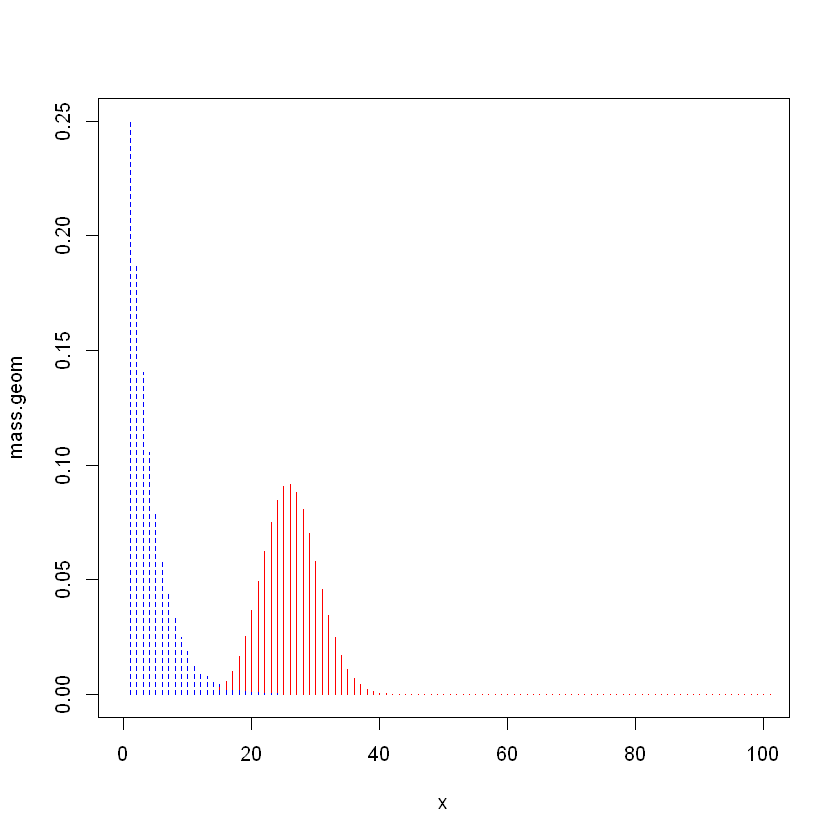

In [3]:
##########################################
# A closer look at Binomial and Geometric
##########################################

# Turns out, this choice of Binomial and Geometric
# can work, but not always. In the code below,
# increase n to see what happens

p <- 0.25
n <- 100
x <- 0:n

mass.geom <- dgeom(x, p)
mass.bin <- dbinom(x, size = n, prob = p)

all_c <- choose(n,x) * (1-p)^(n - 2*x) * p^(x-1)
c <- max(all_c)

plot(x, mass.geom, pch = 16, col = "red", type = "n")
points(mass.bin, pch = 16, col = "red", type = "h")
points(mass.geom, pch = 16, col = "blue", type = "h", lty = 2)

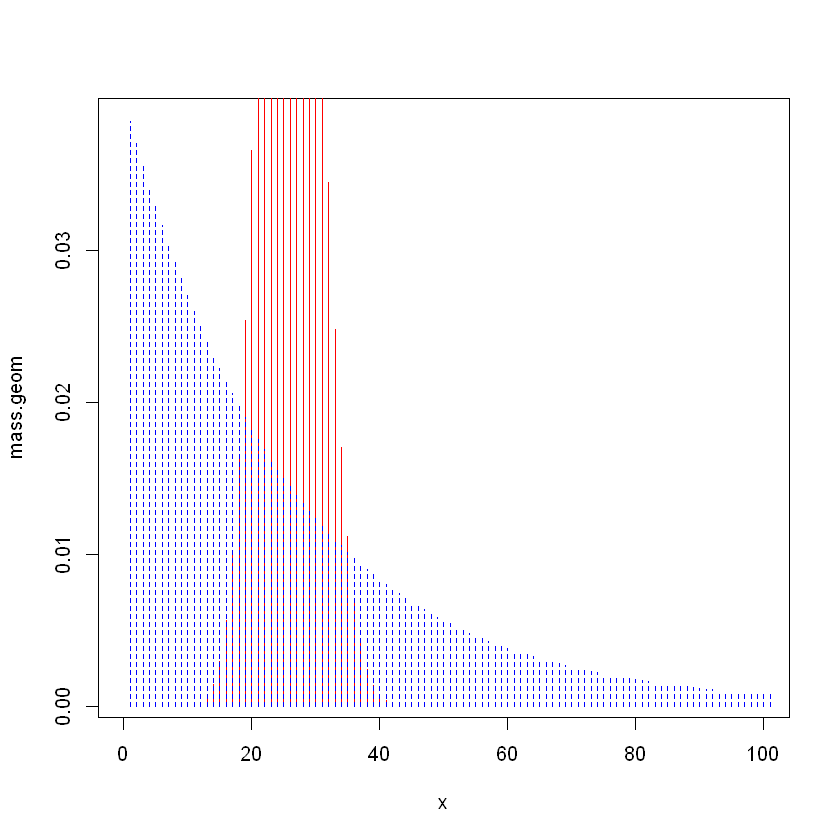

In [4]:
# choosing p* fro rgeom so that np = (1-p*)/p*

p.star <- 1/(n*p + 1)
mass.geom <- dgeom(x, p.star)
mass.bin <- dbinom(x, size = n, prob = p)

all_c <- choose(n,x) * (1-p.star)^(n - 2*x) * p.star^(x-1)
c <- max(all_c)

plot(x, mass.geom, pch = 16, col = "red", type = "n")
points(mass.bin, pch = 16, col = "red", type = "h")
points(mass.geom, pch = 16, col = "blue", type = "h", lty = 2)

## The Composition Method

We have now learned two algorithms for sampling from a discrete distribution: the inverse transform method and the accept-reject algorithm. The inverse transform method can be used for any distribution and the accept-reject can be efficient if used properly.

For certain special distributions, it is easier to use a *composition method* for sampling.

Suppose we have an efficient way of sampling random variable from two pmfs $\{p_j^{(1)}\}$ and $\{p_j^{(2)}\}$, and we want to simulate from

$$P(X = j) = \alpha p_j^{(1)} + (1-\alpha)p_j^{(2)} \quad j \geq 0 \quad \mathrm{where} \ 0 < \alpha < 1.$$

First you should note that the above *composition pmf* is a valid pmf since $\sum_j P(X = j) = 1$. How would we sample in such a situation?

Let $X_1 \sim P^{(1)}$ and $X_2 \sim P^{(2)}$

$$X = \begin{cases}X_1 \quad \mathrm{with \ probability} \ \alpha \\
X_2 \quad \mathrm{with \ probability} \ 1-\alpha\end{cases}$$

**Algorithm 1** Composition method
1. Draw $U \sim U[0,1]$
2. If $U \leq \alpha$ then simulate $X_1 \sim P^{(1)}$ else simulate $X_2$ and stop.

Proof. Consider

$$
\begin{align*}
    P(X = j) &= P(X_1 = j, U \leq \alpha) + P(X_2 = j, \alpha \leq 1) \quad \mathrm{(by \ law \ of \ total \ probability)}\\
    &= P(X_1 = j)P(U \leq \alpha) + P(X_2 = j)P(\alpha < U \leq 1) \quad \mathrm{(by \ law \ of \ total \ probability)}\\
    &= \alpha p_j^{(1)} + (1 - \alpha)p_j^{(2)}
\end{align*}
$$

We can set this up more generally for $k$ different distributions. In general, $F_i, \ i = 1, \dots, k$ are distribution functions, and $\alpha_i$ are such that $0 < \alpha_i < 1$ for all $i$ and $\sum_i \alpha_i = 1$. The composition (or mixture) distribution is

$$F(x) = \sum_{i=1}^k \alpha_iF_i(x).$$

Let $X_i \sim F_i.$ To simulate from the composition $F$, set

$$X = \begin{cases}
X_1 \quad \mathrm{with \ probability \ \alpha_1}\\
X_2 \quad \mathrm{with \ probability \ \alpha_2}\\
\vdots\\
X_k \quad \mathrm{with \ probability \ \alpha_k}\\
\end{cases}$$

*Example 1* (Zero inflated Poisson distribution) A Poisson $(\lambda)$ distribution usually has a small mass at 0. But sometimes, we need a counting distribution with large mass at 0. For example, consider the random variable $X$ being the number of COVID-19 patients tested positive every hour. Many hours of the day this number may be 0, and then this number can be quite high for some hours.

In such a case, we may use the *zero inflated Poisson distribution (ZIP)*. Recall that if $Y \sim \mathrm{Poisson}(\lambda)$.